In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Merged_IMDBTop400.csv
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Horror.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Biography.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Drama.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Family.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Adventure.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Crime.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Fantasy.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Romance.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Thriller.xlsx
/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Raw_Dataset_IMDBTop400/Mystery.xlsx
/kaggle/input/

#  **Exploring data**

In [2]:
IMDB = pd.read_csv('/kaggle/input/imdb-top-400-movies-dataset-2000-to-2024/Merged_IMDBTop400.csv', encoding='latin1')

In [3]:
IMDB.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023?2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0
2,Adventure,3. Percy Jackson and the Olympians,2023?,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN
3,Adventure,4. Game of Thrones,2011?2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0


In [4]:
IMDB.tail()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
6795,War,396. Helen of Troy,2003,6.2?(6.7K),"Votes6,692",TV Mini Series,"The abduction of beautiful Helen, wife of Spar...",NaN
6796,War,397. Anne of Green Gables: The Continuing Story,2000,6.8?(5K),"Votes4,967",TV Mini Series,The continuing adventures of Anne Shirley in N...,NaN
6797,War,398. Ayla,2017,8.3?(43K),"Votes43,179",NaN,Sergeant Suleyman finds a little girl on a bat...,NaN
6798,War,399. The Lost Battalion,2001,7.0?(8.1K),"Votes8,131",TV Movie,Fact-based war drama about an American battali...,NaN
6799,War,400. Stalingrad,2013,5.7?(18K),"Votes17,595",NaN,A group of Russian soldiers fight to hold a st...,49.0


In [5]:
IMDB.sample(10)

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
6775,War,376. The Liberator,2020,7.6?(7K),"Votes6,970",TV Mini Series,The true story of one of the bloodiest battles...,NaN
2143,Documentary,"144. Apolonia, Apolonia",2022,7.1?(596),Votes596,NaN,The talented Apolonia grows up seeking her pla...,77.0
3831,Game-Show,232. A League of Their Own,2010?,7.7?(1.7K),"Votes1,654",TV Series,"Two teams comprised of comedians, celebrities ...",NaN
1651,Crime,52. Wednesday,2022?,8.1?(349K),"Votes348,543",TV Series,"Follows Wednesday Addams' years as a student, ...",NaN
3874,Game-Show,275. Cake Wars,2015?2017,6.3?(466),Votes466,TV Series,Bakers compete to have their cakes showcased a...,NaN
2858,Family,59. Fantastic Beasts: The Crimes of Grindelwald,2018,6.5?(305K),"Votes304,854",NaN,"The second installment of the ""Fantastic Beast...",52.0
744,Animation,345. The Batman,2004?2008,7.4?(13K),"Votes13,214",TV Series,Billionaire Bruce Wayne fights crime and evil ...,NaN
1800,Crime,201. Power,2014?2020,8.1?(52K),"Votes51,573",TV Series,"James ""Ghost"" St. Patrick, a wealthy New York ...",NaN
5548,Romance,349. The Fault in Our Stars,2014,7.7?(397K),"Votes397,353",NaN,Two teenage cancer patients begin a life-affir...,69.0
866,Biography,67. The Social Network,2010,7.8?(750K),"Votes749,582",NaN,As Harvard student Mark Zuckerberg creates the...,95.0


In [6]:
IMDB.describe()

,Metascore
count,3498.000000
mean,63.285592
std,15.602014
min,12.000000
25%,52.000000
50%,64.000000
75%,75.000000
max,98.000000


In [7]:
IMDB['Genre'].value_counts()

Genre
Adventure      400
Game-Show      400
Thriller       400
Sci-Fi         400
Romance        400
Mystery        400
Horror         400
History        400
Fantasy        400
Animation      400
Family         400
Drama          400
Documentary    400
Crime          400
Comedy         400
Biography      400
War            400
Name: count, dtype: int64

In [8]:
IMDB['Type'].value_counts()

Type
TV Series         2475
TV Mini Series     411
TV Movie            35
Video Game          29
TV Special          14
Short               11
Video                9
TV Episode           2
Podcast Series       2
Name: count, dtype: int64

In [9]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              6800 non-null   object 
 1   Movie Name         6800 non-null   object 
 2   Year               6800 non-null   object 
 3   Rating             6795 non-null   object 
 4   Votes              6785 non-null   object 
 5   Type               2988 non-null   object 
 6   Detail/Main Story  6789 non-null   object 
 7   Metascore          3498 non-null   float64
dtypes: float64(1), object(7)
memory usage: 425.1+ KB


In [10]:
IMDB.isnull().sum()

Genre                   0
Movie Name              0
Year                    0
Rating                  5
Votes                  15
Type                 3812
Detail/Main Story      11
Metascore            3302
dtype: int64

# **Data Cleaning**

In [11]:
IMDB['Year']=IMDB['Year'].str.replace('?','-')

In [12]:
IMDB.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023-2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0


In [13]:
#Extracting Count of Rate and Average Rate from Rating column
IMDB['Rate_Count']=IMDB['Rating'].str.extract(r'\((\d+K)\)', expand=True)
IMDB['Avg_rate'] = IMDB['Rating'].str.extract(r'([-+]?\d*\.\d+|\d+)', expand=True).astype(float)

In [14]:
IMDB.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore,Rate_Count,Avg_rate
0,Adventure,1. Echo,2023-2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN,24K,6.1
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0,64K,7.9
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN,18K,7.4
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN,NaN,9.2
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0,95K,6.5


In [15]:
IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              6800 non-null   object 
 1   Movie Name         6800 non-null   object 
 2   Year               6800 non-null   object 
 3   Rating             6795 non-null   object 
 4   Votes              6785 non-null   object 
 5   Type               2988 non-null   object 
 6   Detail/Main Story  6789 non-null   object 
 7   Metascore          3498 non-null   float64
 8   Rate_Count         5299 non-null   object 
 9   Avg_rate           6795 non-null   float64
dtypes: float64(2), object(8)
memory usage: 531.4+ KB


In [16]:
# remove the prefix Votes from Votes column
IMDB['Votes']=IMDB['Votes'].str.replace('Votes','')
IMDB['Votes']=IMDB['Votes'].str.replace(',','')
IMDB.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore,Rate_Count,Avg_rate
0,Adventure,1. Echo,2023-2024,6.1?(24K),23699,TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN,24K,6.1
1,Adventure,2. Society of the Snow,2023,7.9?(64K),64320,NaN,The flight of a rugby team crashes on a glacie...,72.0,64K,7.9
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),18020,TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN,18K,7.4
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),2247841,TV Series,Nine noble families fight for control over the...,NaN,NaN,9.2
4,Adventure,5. Napoleon,2023,6.5?(95K),95398,NaN,An epic that details the checkered rise and fa...,64.0,95K,6.5


In [17]:
IMDB['Metascore'].fillna(IMDB['Metascore'].mean(),inplace=True)
IMDB['Avg_rate'].fillna(IMDB['Avg_rate'].mean(),inplace=True)
IMDB['Movie Name'].fillna('NA', inplace=True)
IMDB['Votes'].fillna(0, inplace=True)
IMDB['Type'].fillna('NA', inplace=True)
IMDB['Rate_Count'].fillna(0, inplace=True)

In [18]:
IMDB.isnull().sum()

Genre                 0
Movie Name            0
Year                  0
Rating                5
Votes                 0
Type                  0
Detail/Main Story    11
Metascore             0
Rate_Count            0
Avg_rate              0
dtype: int64

In [19]:
IMDB.drop(columns=['Rating', 'Detail/Main Story'], inplace=True)

In [20]:
IMDB['Votes'] = IMDB['Votes'].astype(int)

In [21]:
IMDB['Movie Name'] = IMDB['Movie Name'].str.replace(r'^\d+\.\s', '')

In [22]:
IMDB.head()

,Genre,Movie Name,Year,Votes,Type,Metascore,Rate_Count,Avg_rate
0,Adventure,1. Echo,2023-2024,23699,TV Mini Series,63.285592,24K,6.1
1,Adventure,2. Society of the Snow,2023,64320,NA,72.000000,64K,7.9
2,Adventure,3. Percy Jackson and the Olympians,2023-,18020,TV Series,63.285592,18K,7.4
3,Adventure,4. Game of Thrones,2011-2019,2247841,TV Series,63.285592,0,9.2
4,Adventure,5. Napoleon,2023,95398,NA,64.000000,95K,6.5


# **Visualization**

In [23]:
#importing libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

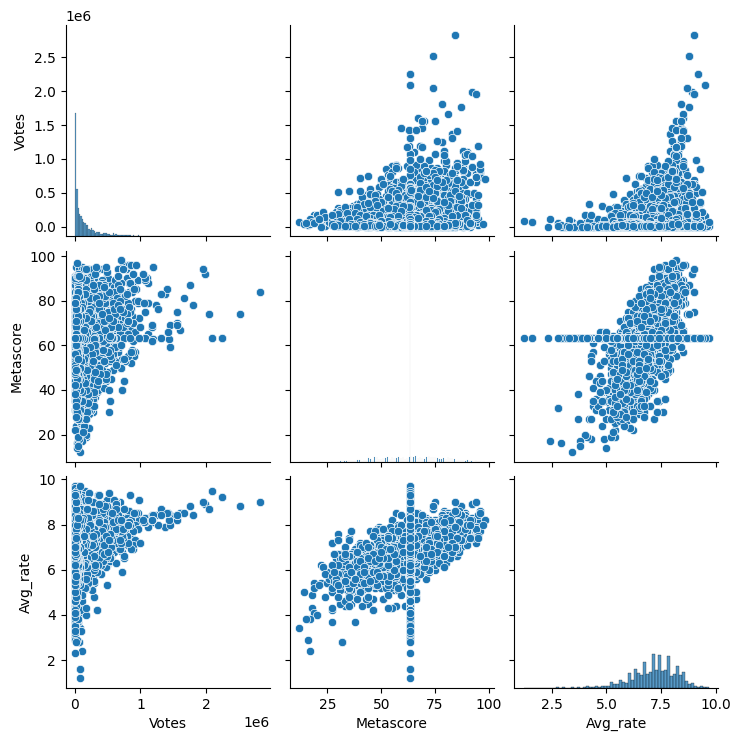

In [24]:
sns.pairplot(IMDB)

Text(0.5, 1.0, 'Average Rating by Genre')

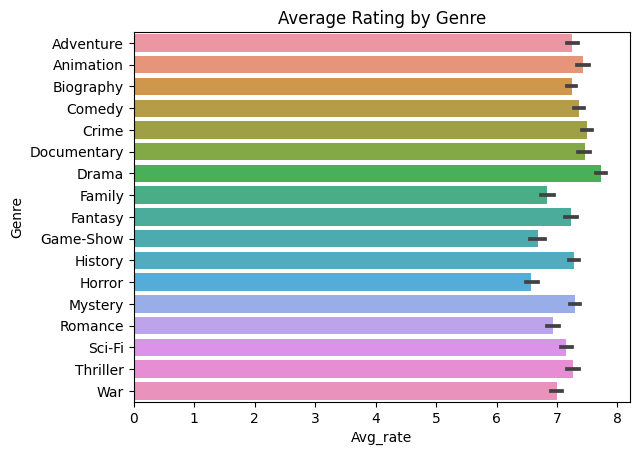

In [25]:
sns.barplot(x='Avg_rate', y='Genre', data=IMDB)
plt.title('Average Rating by Genre')

Text(0.5, 1.0, 'Votes by Type')

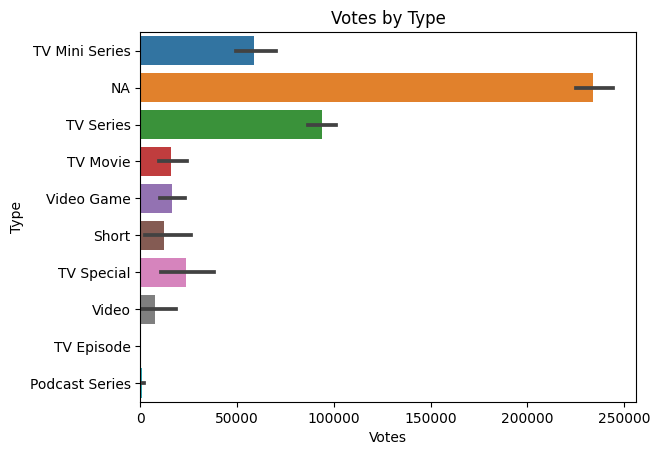

In [26]:
sns.barplot(x='Votes',y='Type',data=IMDB)
plt.title('Votes by Type')

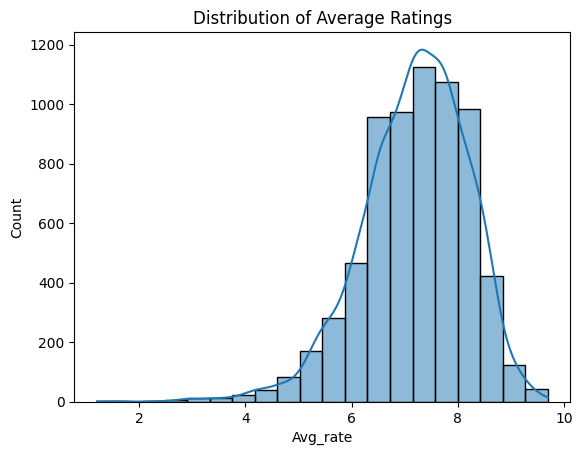

In [27]:
sns.histplot(IMDB['Avg_rate'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.show()

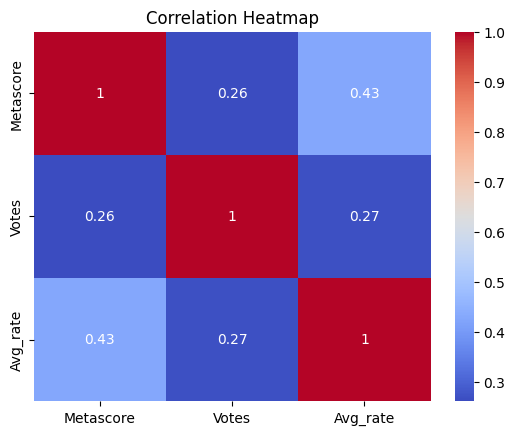

In [28]:
correlation_matrix = IMDB[['Metascore', 'Votes', 'Avg_rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

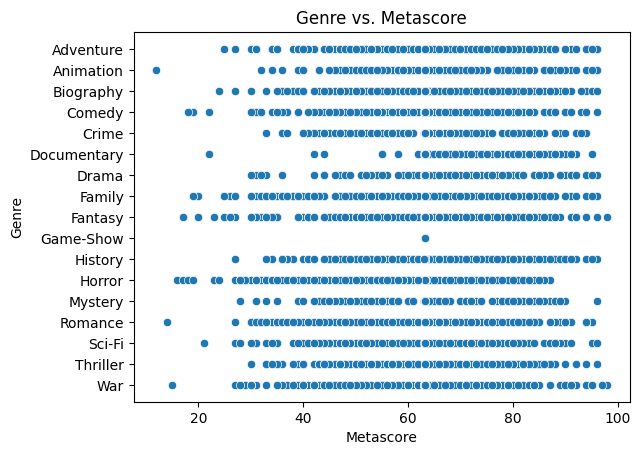

In [29]:
sns.scatterplot(x='Metascore', y='Genre', data=IMDB)
plt.title('Genre vs. Metascore')
plt.show()

<Axes: xlabel='Genre', ylabel='count'>

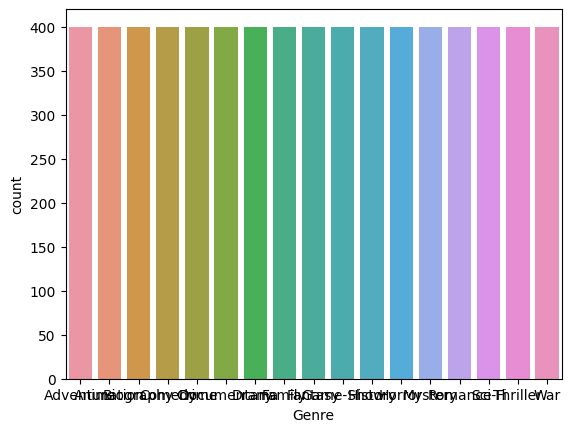

In [30]:
sns.countplot(x='Genre',data=IMDB)

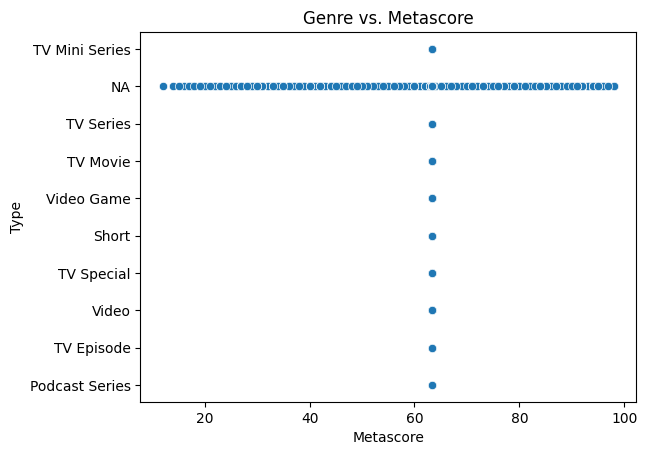

In [31]:
sns.scatterplot(x='Metascore', y='Type', data=IMDB)
plt.title('Genre vs. Metascore')
plt.show()